# JAM FITTER

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy

import matplotlib.pyplot as plt

def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [2]:
path2results='sia_sidis_collins'
checkdir(path2results)
path2figs='sia_sidis_collins/figs'
checkdir(path2figs)

## SIA and SIDIS data sets

In [3]:
conf['datasets']={}

# SIA

conf['datasets']['sia']={}


conf['datasets']['sia']['norm']={}

conf['datasets']['sia']['filters']=[] # npts    = 122 chi2    = 69.799935
#conf['datasets']['sia']['filters'].append("z<0.6") 
#conf['datasets']['sia']['filters'].append("Q2>1.69") 
#conf['datasets']['sia']['filters'].append("pT>0.2 and pT<0.9") 


conf['datasets']['sia']['xlsx']={}

conf['datasets']['sia']['xlsx'][1000]='sia/expdata/1000.xlsx' # babar | pi,pi | AUL-0     | 9      | z1,z2,pT0  |    
conf['datasets']['sia']['xlsx'][1001]='sia/expdata/1001.xlsx' # babar | pi,pi | AUC-0     | 9      | z1,z2,pT0  |    
conf['datasets']['sia']['xlsx'][1002]='sia/expdata/1002.xlsx' # babar | pi,pi | AUC-0     | 36     | z1,z2      |    
conf['datasets']['sia']['xlsx'][1003]='sia/expdata/1003.xlsx' # babar | pi,pi | AUL-0     | 36     | z1,z2      |    
conf['datasets']['sia']['xlsx'][1004]='sia/expdata/1004.xlsx' # belle | pi,pi | AUT-0-CCP | 16     | z1,z2,qT   |    
conf['datasets']['sia']['xlsx'][1005]='sia/expdata/1005.xlsx' # belle | pi,pi | AUT-0     | 16     | z1,z2,qT   |   
conf['datasets']['sia']['xlsx'][2008]='sia/expdata/2008.xlsx' # | babar      | pi,pi | AUL-0            | 16     | z1,z2      |    
conf['datasets']['sia']['xlsx'][2009]='sia/expdata/2009.xlsx' # | babar      | pi,pi | AUC-0            | 16     | z1,z2      |   

# Collins Asy

conf['datasets']['sidis']={}
conf['datasets']['sidis']['norm']={}
conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['filters']={}

conf['datasets']['sidis']['filters'][0]={}
conf['datasets']['sidis']['filters'][0]['idx']=[4001,4000,4002,4004,4003,4005,3027,3025,3010,3012,3005,3013,3026,3000,3003,3016,3004,3018]
conf['datasets']['sidis']['filters'][0]['filter']="z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"

#conf["datasets"]["sidis"]["xlsx"][4007]="../database/sidis/expdata/4007.xlsx"  #  compass  deuteron   k+   pT
#conf["datasets"]["sidis"]["xlsx"][4006]="../database/sidis/expdata/4006.xlsx"  #  compass  deuteron   k+    x
#conf["datasets"]["sidis"]["xlsx"][4008]="../database/sidis/expdata/4008.xlsx"  #  compass  deuteron   k+    z
#conf["datasets"]["sidis"]["xlsx"][4010]="../database/sidis/expdata/4010.xlsx"  #  compass  deuteron   k-   pT
#conf["datasets"]["sidis"]["xlsx"][4009]="../database/sidis/expdata/4009.xlsx"  #  compass  deuteron   k-    x
#conf["datasets"]["sidis"]["xlsx"][4011]="../database/sidis/expdata/4011.xlsx"  #  compass  deuteron   k-    z
conf["datasets"]["sidis"]["xlsx"][4001]="sidis/expdata/4001.xlsx"  #  compass  deuteron  pi+   pT
conf["datasets"]["sidis"]["xlsx"][4000]="sidis/expdata/4000.xlsx"  #  compass  deuteron  pi+    x
conf["datasets"]["sidis"]["xlsx"][4002]="sidis/expdata/4002.xlsx"  #  compass  deuteron  pi+    z
conf["datasets"]["sidis"]["xlsx"][4004]="sidis/expdata/4004.xlsx"  #  compass  deuteron  pi-   pT
conf["datasets"]["sidis"]["xlsx"][4003]="sidis/expdata/4003.xlsx"  #  compass  deuteron  pi-    x
conf["datasets"]["sidis"]["xlsx"][4005]="sidis/expdata/4005.xlsx"  #  compass  deuteron  pi-    z
#conf["datasets"]["sidis"]["xlsx"][6003]="../database/sidis/expdata/6003.xlsx"  #  compass    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][6004]="../database/sidis/expdata/6004.xlsx"  #  compass    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][6005]="../database/sidis/expdata/6005.xlsx"  #  compass    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][6000]="../database/sidis/expdata/6000.xlsx"  #  compass    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][6001]="../database/sidis/expdata/6001.xlsx"  #  compass    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][6002]="../database/sidis/expdata/6002.xlsx"  #  compass    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3027]="sidis/expdata/3027.xlsx"  #  compass    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3025]="sidis/expdata/3025.xlsx"  #  compass    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3010]="sidis/expdata/3010.xlsx"  #  compass    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3012]="sidis/expdata/3012.xlsx"  #  compass    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3005]="sidis/expdata/3005.xlsx"  #  compass    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3013]="sidis/expdata/3013.xlsx"  #  compass    proton  pi-    z
#conf["datasets"]["sidis"]["xlsx"][3024]="../database/sidis/expdata/3024.xlsx"  #   HERMES    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][3007]="../database/sidis/expdata/3007.xlsx"  #   HERMES    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][3008]="../database/sidis/expdata/3008.xlsx"  #   HERMES    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][3021]="../database/sidis/expdata/3021.xlsx"  #   HERMES    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][3017]="../database/sidis/expdata/3017.xlsx"  #   HERMES    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][3023]="../database/sidis/expdata/3023.xlsx"  #   HERMES    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3026]="sidis/expdata/3026.xlsx"  #   HERMES    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3000]="sidis/expdata/3000.xlsx"  #   HERMES    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3003]="sidis/expdata/3003.xlsx"  #   HERMES    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3016]="sidis/expdata/3016.xlsx"  #   HERMES    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3004]="sidis/expdata/3004.xlsx"  #   HERMES    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3018]="sidis/expdata/3018.xlsx"  #   HERMES    proton  pi-    z

for k in conf['datasets']['sia']['xlsx']: conf['datasets']['sia']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 
for k in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1}


## parameters

In [4]:
conf['params']={}
conf['basis']='default'
conf['shape']=1

### TMD PDF/FF parameters (from upol analysis)

In [5]:
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':5.89294556274006398056e-01,'fixed':True,'min':0,'max':1}
conf['params']['pdf']['widths0 sea']      = {'value':6.33443286558464269120e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.15151579728561548333e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.36784756168045196212e-01,'fixed':True,'min':0,'max':1}

### TMD Collins and transversityparameters

In [6]:
conf['params']['collins']={}
conf['params']['collins']['widths0 pi+ fav']     = {'value':7.19232859343037628230e-02,'fixed':False,'min':0.05,'max':0.09}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':7.19232859343037628230e-02,'fixed':'widths0 pi+ fav','min':1e-5,'max':0.2}
#conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.07649,'fixed':False,'min':1e-5,'max':0.2}
conf['params']['collins']['pi+ u N 1']  = {'value': 1.67606899743756615484e-01,'fixed':False,'min':0,'max':3}
conf['params']['collins']['pi+ u a 1']  = {'value':-2.34487913934317360187e+00,'fixed':False,'min':-2.59,'max':-1}
conf['params']['collins']['pi+ u b 1']  = {'value': 3.39386888313381485105e+00,'fixed':False,'min':2.5,'max':4.5}

conf['params']['collins']['pi+ d N 1']  = {'value':-7.76834030946873671519e-02,'fixed':False,'min':-10,'max':-4}
conf['params']['collins']['pi+ d a 1']  = {'value':-1.71364502387007289208e+00,'fixed':False,'min': -2.,'max':4.}
conf['params']['collins']['pi+ d b 1']  = {'value': 9.12304018334302968540e-01,'fixed':False,'min':0.0,'max':3.8}

conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 9.04828290386509499513e+05,'fixed':False,'min':4,'max':10}
conf['params']['collins']['pi+ u a 2']  = {'value': 1.75039868247003767010e+01,'fixed':False,'min':2,'max':9}
conf['params']['collins']['pi+ u b 2']  = {'value': 9.41062029335155081355e+00,'fixed':False,'min':2,'max':5}

conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['transversity']={}
conf['params']['transversity']['widths0 valence'] = {'value':5.35200557012728173056e-01,'fixed':False,'min':1e-5,'max':2}
conf['params']['transversity']['widths0 sea']     = {'value':4.04126169244575006445e-01,'fixed':True,'min':1e-5,'max':2}
conf['params']['transversity']['u N']             = {'value':4.02410858816470007326e+00 ,'fixed':False,'min':-10,'max':10}
conf['params']['transversity']['u a']             = {'value':5.02101228643047514666e-01 ,'fixed':False,'min':-1,'max':10}
conf['params']['transversity']['u b']             = {'value':3.07561607127350322699e+00,'fixed':False,'min':1e-5,'max':10}
conf['params']['transversity']['d N']             = {'value':-3.73417493409145180294e+01,'fixed':False,'min':-20,'max':20}
conf['params']['transversity']['d a']             = {'value':8.64843052456481742318e-01,'fixed':False,'min':-1,'max':5}
conf['params']['transversity']['d b']             = {'value':6.33176893162377751878e+00,'fixed':False,'min':1e-5,'max':20}
conf['params']['transversity']['s N']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s a']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-1,'max':5}
conf['params']['transversity']['s b']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':1e-5,'max':10}

conf['params']['transversity']['u c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s c']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}

conf['params']['transversity']['u d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s d']             = {'value':0.00000000000000000000e+00,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [7]:
conf['ncpus']=1
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sidis data sets 3013
multiprocess setup: ncpus=1 / observable
loading sia data sets 2009
multiprocess setup: ncpus=1 / observable


### start multiple NS runs
- the code will start n independent runs specified by size

In [ ]:
conf['size']=10
conf['factor']=4 # play with the factor (3,4) and the tolerance (1.e-5,1.e-10)
conf['tol']=1e-10
mcsamp.run(path2results)

iter=44  logz=-inf rel-err=3.036e-01  t-elapsed=2.856e+01  dchi2min=1.662e+03 dchi2max=8.152e+03

### combine multiple runs into one big run

In [8]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
-39.2124153891
-39.2113495504
-39.2132911863
-39.2132923725
-39.2132506002
-39.2132865177
-39.2132924059
sample  size= 76677
sample2 size= 3715


### distribution of parameters

In [9]:
os.listdir(path2results+'/mcdata')

['1.dat', '2.dat', '3.dat', '5.dat', '6.dat', '7.dat', '9.dat']

     widths0 pi+ fav =    0.07415 +/-    0.00203
           pi+ u N 1 =    0.55339 +/-    0.06999
           pi+ u a 1 =   -1.89331 +/-    0.06812
           pi+ u b 1 =    4.23292 +/-    0.18214
           pi+ d N 1 =   -5.51853 +/-    1.09372
           pi+ d a 1 =    2.39775 +/-    0.29890
           pi+ d b 1 =    3.18611 +/-    0.11052
           pi+ u N 2 =    6.82170 +/-    1.53795
           pi+ u a 2 =    7.83215 +/-    0.73096
           pi+ u b 2 =    2.96675 +/-    0.20382
     widths0 valence =    0.69430 +/-    0.11442
                 u N =    6.73373 +/-    1.86714
                 u a =    0.64806 +/-    0.10671
                 u b =    4.02789 +/-    0.89771
                 d N =  -13.79508 +/-    3.62029
                 d a =    0.52431 +/-    0.09821
                 d b =    3.47124 +/-    0.79218


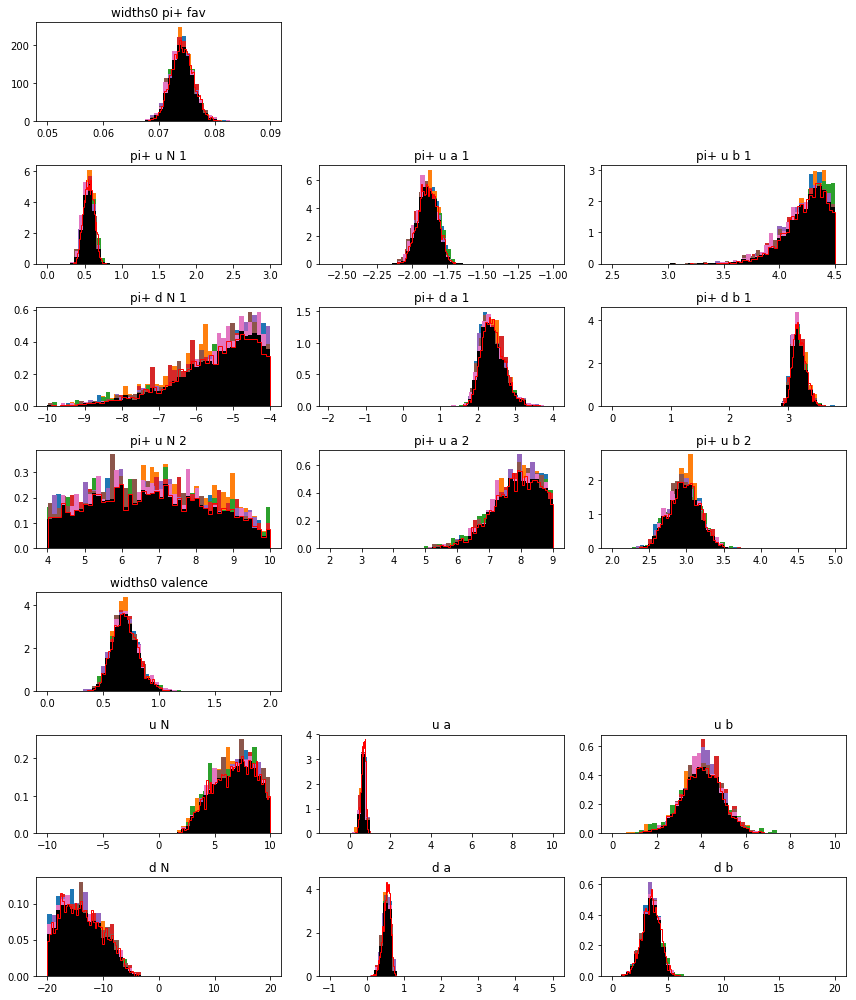

In [11]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=7,3
fig = py.figure(figsize=(ncols*4,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()

#plot(['collins','widths0 pi+ fav','widths0 pi+ unfav',None])
plot(['collins','widths0 pi+ fav',None,None])
plot(['collins','pi+ u N 1','pi+ u a 1','pi+ u b 1'])
plot(['collins','pi+ d N 1','pi+ d a 1','pi+ d b 1'])
plot(['collins','pi+ u N 2','pi+ u a 2','pi+ u b 2'])
plot(['transversity','widths0 valence',None,None])
plot(['transversity','u N','u a','u b'])
plot(['transversity','d N','d a','d b'])

## data vs theory

In [44]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].siares.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].siares.tabs[k]['thy']    
        norm=conf['datasets']['sia']['norm'][k]['value']
        shift=conf['resman'].siares.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sia.dat'))   

2022/2022

### compute averages and collect results

In [12]:
data=load('%s/%s'%(path2results,'sia.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].siares.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].siares.tabs[k]['dthy']=copy.copy(dthy[k])

In [13]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: 
        delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))

sidis
sia


In [14]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   4000   deuteron        pi+    compass AUTcollins     6       9.69       0.00       0.00
   4001   deuteron        pi+    compass AUTcollins     6      10.89       0.00       0.00
   4002   deuteron        pi+    compass AUTcollins     6      13.13       0.00       0.00
   4003   deuteron        pi-    compass AUTcollins     6       9.08       0.00       0.00
   4004   deuteron        pi-    compass AUTcollins     6       7.77       0.00       0.00
   4005   deuteron        pi-    compass AUTcollins     6       3.68       0.00       0.00
   3016     proton        pi-     HERMES AUTcollins     5       5.27       0.00       0.00
   3018     proton        pi-     HERMES AUTcollins     6       4.06       0.00       0.00
   3010     proton        pi+    compass AUTcollins     6       6.38       0.00       0.00
   3025     proton        pi+    compass AUTcollins     7       5.50     

### plot data and theory SIA

In [15]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',        u'dthy',         u'dz1',
               u'dz2',     u'hadron1',     u'hadron2',           u'i',
               u'obs',          u'pT',       u'pTmax',       u'pTmin',
                u'qT', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',       u'sys_u',       u'syt_u',         u'thy',
             u'value',          u'z1',       u'z1max',       u'z1min',
                u'z2',       u'z2max',       u'z2min'],
      dtype='object')

In [16]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 52
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 52
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16


In [17]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [18]:
def plot(data):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_auc = data['AUC-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_aul = data['AUL-0-PT-INT'].query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))


        plt.subplot(n_row, n_col, index+1)
        plt.errorbar(data_auc.z2, data_auc.value, data_auc.alpha, 
                    marker='o', linestyle='', color='red', label='$A_{UC}$')
        plt.plot(data_auc.z2, data_auc.thy, linestyle='-', color='red')
        plt.fill_between(data_auc.z2, data_auc.thy-data_auc.dthy, data_auc.thy+data_auc.dthy,
                         color='black', alpha=0.8)


        plt.errorbar(data_aul.z2, data_aul.value, data_aul.alpha, 
                    marker='o', linestyle='', color='blue', label='$A_{UL}$')
        plt.plot(data_aul.z2, data_aul.thy, linestyle='-', color='blue')
        plt.fill_between(data_aul.z2, data_aul.thy-data_aul.dthy, data_aul.thy+data_aul.dthy, 
                         color='orange', alpha=0.8)
        
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        # the legend has theory labels and I dont like them.
        if len(data_auc) > 0 and len(data_aul) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

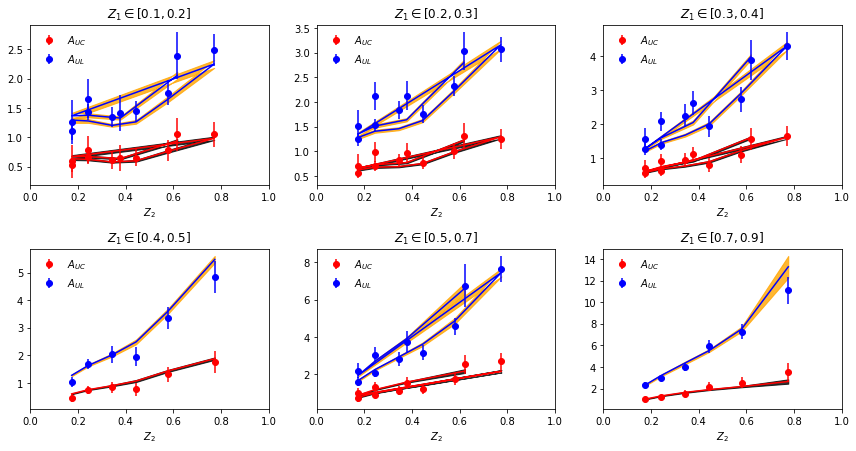

In [19]:
plot(data['BaBaR'])

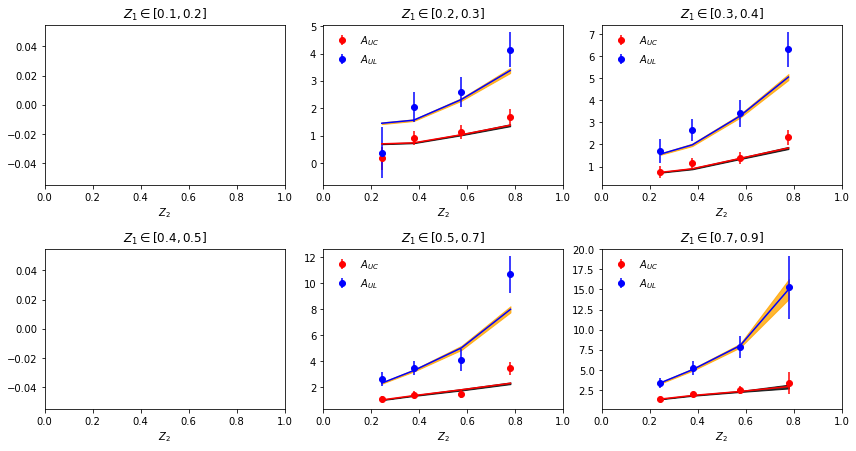

In [20]:
plot(data['belle'])
py.savefig('gallery/transversity/dvt.pdf')

## PDFs and FFs

In [21]:
def calc(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',MC['weights2'],RAW)
    df=np.einsum('k,kif->if',MC['weights2'],(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [22]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,0.999)
Z=np.append(Z1,Z2)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

857/857

In [1]:
nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*5))
ax=py.subplot(nrows,ncols,1)
ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5)
ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5)
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Hpi['f'][1],'r')
ax.plot(Z,Z*Hpi['f'][3],'b')
ax.set_ylabel(r'$z H_1^{\perp (1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.2,1.5)
ax.set_xlim(0,1)


py.tight_layout()



NameError: name 'py' is not defined

In [26]:
### plot data and theory SIDIS

KeyError: 'dthy'

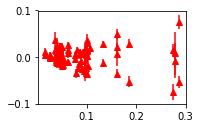

In [36]:
 def get_key(K,tar,had,col,tabs,dep):
    kk=None
    for k in K:
        d=tabs
        #print '-->',d['target'].values[0],d['hadron'].values[0],d['col'].values[0].upper()
        if tar==d['target'].values[0] \
            and had==d['hadron'].values[0] \
            and dep==d['dependence'].values[0] \
            and col==d['col'].values[0].upper().strip(): kk=k
    return kk

tabs=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])
#resman.sidisres.tabs
def plot(idx,dep,tar,had,col,legend=False):
    #print tar,had,col
    k=get_key(tabs.keys(),tar,had,col,tabs,dep)
    d1=tabs
    ax=py.subplot(nrows,ncols,idx)
    dep=d1['dependence'].values[0]
    #obs=d['obs'].values[0]
    tar=d1['target'].values[0]
    had=d1['hadron'].values[0]
    if dep=='pt': dep='pT'
    sign=1
    if col=='COMPASS': sign=-1
    shift=0
    if '-' in had:shift=0.005
    if '-' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='bv')
    if '+' in had: e=ax.errorbar(d1[dep]+shift,sign*d1['value'],d1['alpha'],fmt='r^')
    b1=ax.fill_between(d1[dep],sign*(d1['thy']-d1['dthy']),sign*(d1['thy']+d1['dthy']),color='Yellow',alpha=0.5)
    l1,=ax.plot(d1[dep],sign*d1['thy'],'k--')
    if dep=='x': ax.set_xlabel(r'$\boldsymbol{x}$',size=20)
    if dep=='z': ax.set_xlabel(r'$\boldsymbol{z}$',size=20)
    if dep=='pT': ax.set_xlabel(r'$\boldsymbol{p_T}$',size=20)
    ax.xaxis.set_label_coords(0.95, -0.02)
    if dep=='x':
        ax.set_xlim(0,0.3)
        ax.set_xticks([0.1,0.2])
    if dep=='z':
        ax.set_xlim(0.2,0.65)
        ax.set_xticks([0.3,0.4,0.5])
    if dep=='pT':
        ax.set_xlim(0.1,0.9)
        ax.set_xticks([0.2,0.4,0.6])

    #if dep=='pT':ax.set_xlim(0.2,0.65)
    #ax.tick_params(axis='both', which='major', labelsize=16)
    #ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.set_ylabel(obs)
    #ax.set_title('%s %s %s'%(tar,had.replace('+','').replace('-',''),col))
    #ax.set_xlim(0,0.3)
    #ax.set_ylim(-.1,.1)
    #ax.set_xticklabels([])
    ax.text(0.1,0.1,col,transform=ax.transAxes,size=10)
    if legend: return ax,(b1,l1),e
    else: return ax


nrows,ncols=6,3
py.figure(figsize=(ncols*3,nrows*2))

ax=plot(1,'x','proton','pi+','HERMES')
ax=plot(1,'x','proton','pi-','HERMES')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(2,'z','proton','pi+','HERMES')
ax=plot(2,'z','proton','pi-','HERMES')
ax=plot(3,'pt','proton','pi+','HERMES')
ax=plot(3,'pt','proton','pi-','HERMES')

ax=plot(4,'x','proton','pi+','COMPASS')
ax=plot(4,'x','proton','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(p,\pi)$',size=20)
ax=plot(5,'z','proton','pi+','COMPASS')
ax=plot(5,'z','proton','pi-','COMPASS')
ax=plot(6,'pt','proton','pi+','COMPASS')
ax=plot(6,'pt','proton','pi-','COMPASS')

ax=plot(7,'x','deuteron','pi+','COMPASS')
ax=plot(7,'x','deuteron','pi-','COMPASS')
ax.set_ylabel(r'$A_{UT}^{C}(d,\pi)$',size=20)
ax=plot(8,'z','deuteron','pi+','COMPASS')
ax=plot(8,'z','deuteron','pi-','COMPASS')
ax,b1,ep=plot(9,'pT','deuteron','pi+','COMPASS',legend=True)
ax,b1,em=plot(9,'pT','deuteron','pi-','COMPASS',legend=True)

# ax=plot(10,'x','proton','k+','HERMES')
# ax=plot(10,'x','proton','k-','HERMES')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(11,'z','proton','k+','HERMES')
# ax=plot(11,'z','proton','k-','HERMES')
# ax=plot(12,'pt','proton','k+','HERMES')
# ax=plot(12,'pt','proton','k-','HERMES')

# ax=plot(13,'x','proton','k+','COMPASS')
# ax=plot(13,'x','proton','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(p,K)$',size=20)
# ax=plot(14,'z','proton','k+','COMPASS')
# ax=plot(14,'z','proton','k-','COMPASS')
# ax=plot(15,'pt','proton','k+','COMPASS')
# ax=plot(15,'pt','proton','k-','COMPASS')


# ax=plot(16,'x','deuteron','k+','COMPASS')
# ax=plot(16,'x','deuteron','k-','COMPASS')
# ax.set_ylabel(r'$A_{UT}^{C}(d,K)$',size=20)
# ax,b1,ep=plot(17,'z','deuteron','k+','COMPASS',legend=True)
# ax,b1,em=plot(17,'z','deuteron','k-','COMPASS',legend=True)
# ax=plot(18,'pT','deuteron','k+','COMPASS')
# ax=plot(18,'pT','deuteron','k-','COMPASS')
ax.legend([b1,ep,em],[r'$\rm SIDIS$',r'$(\pi^+)$',r'$(\pi^-)$']\
           ,loc='upper center', bbox_to_anchor=(-0.2, -0.3)\
           ,fancybox=True, shadow=False, ncol=4,fontsize=17)


py.subplots_adjust(wspace=0.3, hspace=0.2,left=0.11, bottom=0.1, right=0.95, top=0.95)



In [40]:
tabs['target'].values

array([u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'deuteron', u'deuteron', u'deuteron', u'deuteron',
       u'deuteron', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'proton', u'proton',
       u'proton', u'proton', u'proton', u'proton', u'pro